# Project flow chart till now:- 

In [395]:
import string

from collections import Counter #For simple counting

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk

import warnings
warnings.filterwarnings('ignore')

In [396]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [397]:
import json

In [398]:
import pandas as pd
df = pd.read_json('Cell_Phones_and_Accessories.json',encoding='utf-8')

In [399]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


In [400]:
df[1135:1145] #df[1140] is present here.after deleting by dropna technique the index is not getting rearanged.
#Dats y its giving error : 1140 while applying NLP techniques
#We have to rearrange the index after removing unnecessary columns.
#Then only we can proceed.


,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
1135,5,False,"02 18, 2016",B004F1F9P6,None,W. T.,I live where it's a maybe to make a call insid...,Great Device !!!,1455753600,None,None
1136,5,True,"07 24, 2016",B01CCUDUYS,None,Ant and mel +1 and 2 crazy dogs,Great set of cables!! works well!! just as pic...,Great set of cables!,1469318400,None,None
1137,5,True,"06 15, 2016",B013JNAUMW,None,Mohamed,Very good items,Four Stars,1465948800,None,None
1138,5,True,"07 16, 2013",B009CEZGKE,None,H. A. Syed,For normal use its a great phone. Using it for...,AT&T Fusion 2 GoPhone (AT&T),1373932800,None,None
1139,5,True,"01 25, 2018",B01GJC4YMC,{'Color:': ' Red 6.5ft'},Terre,It works perfectly.,Works well and is strong.,1516838400,None,None
1140,5,True,"10 17, 2016",B00MR9BKMY,None,Gizmo,Just as good as the otter box. Purchased after...,None,1476662400,None,None
1141,4,True,"01 8, 2015",B00OTIXH5O,{'Color:': ' Silver'},Will,"Looks great, doesn't bother signal, & ""Samsung...",Now this feels like a $700 phone!,1420675200,None,None
1142,5,True,"06 21, 2015",B00MAWQVZY,"{'Color:': ' TA Gunmetal', 'Package Type:': ' ...",David,I've used Spigen on my Note 3 since I got it 2...,Awesome protection,1434844800,None,None
1143,3,True,"04 25, 2015",B00N5T7MKO,None,Linda C.,"Smaller than what I expected, but okay.",Three Stars,1429920000,None,None
1144,5,True,"01 10, 2017",B01GIWFRHO,{'Color:': ' Crystal Clear'},Finkster,"Bought this as a quick temporary case, but it'...","Thought this would be a temp case, but it's st...",1484006400,None,None


In [401]:
df.shape

(760450, 11)

In [402]:
df.dtypes

Rating               int64
Rev_verify            bool
Review_Date         object
IC                  object
Prod_meta           object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
Useful              object
Prod_img            object
dtype: object

# Features abbreviations

# EDA by sweetviz library

In [403]:
#TypeError: unhashable type: 'dict'--------This error is due to data.the data is still a dataframe.not a dictionary.
type(df)

pandas.core.frame.DataFrame

# Feature Engineering

# checking for null values

In [404]:
df.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

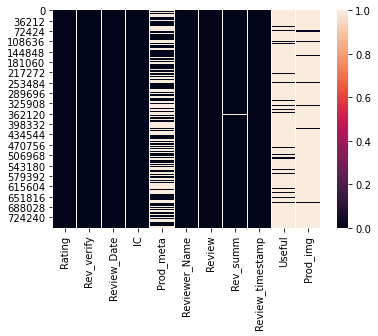

In [405]:
import seaborn as sns
sns.heatmap(df.isnull())

# There are many null values in th dataset which are to be treated accordingly and with logic of replacement

In [406]:
df.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

# Dropping 'Useful' & 'Prod_img' features

In [407]:
df=df.drop(['Prod_meta','Useful','Prod_img'],axis=1)

In [408]:
df.shape

(760450, 8)

In [409]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp
0,5,True,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600
1,5,True,"01 9, 2016",B016MF3P3K,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600
2,5,True,"04 21, 2013",B008DC8N5G,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400
3,3,True,"02 27, 2013",B0089CH3TM,Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200
4,4,True,"12 19, 2013",B00AKZWGAC,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200


In [410]:
df.dtypes

Rating               int64
Rev_verify            bool
Review_Date         object
IC                  object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
dtype: object

In [411]:
df.isnull().sum()

Rating                0
Rev_verify            0
Review_Date           0
IC                    0
Reviewer_Name        91
Review              530
Rev_summ            355
Review_timestamp      0
dtype: int64

# 'Reviewer_Name'

In [412]:
#df['Reviewer_Name'].mode()[0]

In [413]:
df['Reviewer_Name']=df['Reviewer_Name'].mode()[0]

In [414]:
df.isnull().sum()

Rating                0
Rev_verify            0
Review_Date           0
IC                    0
Reviewer_Name         0
Review              530
Rev_summ            355
Review_timestamp      0
dtype: int64

# We will delete rows of features 'Review','Rev_summ'  which are having null values as taking mode is not a good idea for 'Review' feature.

In [415]:
df.shape

(760450, 8)

In [416]:
df[1135:1145] #df[1140] index is PRESENT in the dataset now

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp
1135,5,False,"02 18, 2016",B004F1F9P6,Amazon Customer,I live where it's a maybe to make a call insid...,Great Device !!!,1455753600
1136,5,True,"07 24, 2016",B01CCUDUYS,Amazon Customer,Great set of cables!! works well!! just as pic...,Great set of cables!,1469318400
1137,5,True,"06 15, 2016",B013JNAUMW,Amazon Customer,Very good items,Four Stars,1465948800
1138,5,True,"07 16, 2013",B009CEZGKE,Amazon Customer,For normal use its a great phone. Using it for...,AT&T Fusion 2 GoPhone (AT&T),1373932800
1139,5,True,"01 25, 2018",B01GJC4YMC,Amazon Customer,It works perfectly.,Works well and is strong.,1516838400
1140,5,True,"10 17, 2016",B00MR9BKMY,Amazon Customer,Just as good as the otter box. Purchased after...,None,1476662400
1141,4,True,"01 8, 2015",B00OTIXH5O,Amazon Customer,"Looks great, doesn't bother signal, & ""Samsung...",Now this feels like a $700 phone!,1420675200
1142,5,True,"06 21, 2015",B00MAWQVZY,Amazon Customer,I've used Spigen on my Note 3 since I got it 2...,Awesome protection,1434844800
1143,3,True,"04 25, 2015",B00N5T7MKO,Amazon Customer,"Smaller than what I expected, but okay.",Three Stars,1429920000
1144,5,True,"01 10, 2017",B01GIWFRHO,Amazon Customer,"Bought this as a quick temporary case, but it'...","Thought this would be a temp case, but it's st...",1484006400


In [417]:
df=df.dropna(how='any')

In [418]:
df[1135:1145] #df[1140] index is NOT present in the dataset now

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp
1135,5,False,"02 18, 2016",B004F1F9P6,Amazon Customer,I live where it's a maybe to make a call insid...,Great Device !!!,1455753600
1136,5,True,"07 24, 2016",B01CCUDUYS,Amazon Customer,Great set of cables!! works well!! just as pic...,Great set of cables!,1469318400
1137,5,True,"06 15, 2016",B013JNAUMW,Amazon Customer,Very good items,Four Stars,1465948800
1138,5,True,"07 16, 2013",B009CEZGKE,Amazon Customer,For normal use its a great phone. Using it for...,AT&T Fusion 2 GoPhone (AT&T),1373932800
1139,5,True,"01 25, 2018",B01GJC4YMC,Amazon Customer,It works perfectly.,Works well and is strong.,1516838400
1141,4,True,"01 8, 2015",B00OTIXH5O,Amazon Customer,"Looks great, doesn't bother signal, & ""Samsung...",Now this feels like a $700 phone!,1420675200
1142,5,True,"06 21, 2015",B00MAWQVZY,Amazon Customer,I've used Spigen on my Note 3 since I got it 2...,Awesome protection,1434844800
1143,3,True,"04 25, 2015",B00N5T7MKO,Amazon Customer,"Smaller than what I expected, but okay.",Three Stars,1429920000
1144,5,True,"01 10, 2017",B01GIWFRHO,Amazon Customer,"Bought this as a quick temporary case, but it'...","Thought this would be a temp case, but it's st...",1484006400
1145,5,True,"11 12, 2015",B00PBJLGOE,Amazon Customer,This case was a pleasant surprise. Well made ...,Love the pockets,1447286400


# Reset index

In [419]:
df = df.reset_index(drop=True)

In [420]:
df[1135:1145] #df[1140] index is PRESENT in the dataset now after resetting index with drop=True

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp
1135,5,False,"02 18, 2016",B004F1F9P6,Amazon Customer,I live where it's a maybe to make a call insid...,Great Device !!!,1455753600
1136,5,True,"07 24, 2016",B01CCUDUYS,Amazon Customer,Great set of cables!! works well!! just as pic...,Great set of cables!,1469318400
1137,5,True,"06 15, 2016",B013JNAUMW,Amazon Customer,Very good items,Four Stars,1465948800
1138,5,True,"07 16, 2013",B009CEZGKE,Amazon Customer,For normal use its a great phone. Using it for...,AT&T Fusion 2 GoPhone (AT&T),1373932800
1139,5,True,"01 25, 2018",B01GJC4YMC,Amazon Customer,It works perfectly.,Works well and is strong.,1516838400
1140,4,True,"01 8, 2015",B00OTIXH5O,Amazon Customer,"Looks great, doesn't bother signal, & ""Samsung...",Now this feels like a $700 phone!,1420675200
1141,5,True,"06 21, 2015",B00MAWQVZY,Amazon Customer,I've used Spigen on my Note 3 since I got it 2...,Awesome protection,1434844800
1142,3,True,"04 25, 2015",B00N5T7MKO,Amazon Customer,"Smaller than what I expected, but okay.",Three Stars,1429920000
1143,5,True,"01 10, 2017",B01GIWFRHO,Amazon Customer,"Bought this as a quick temporary case, but it'...","Thought this would be a temp case, but it's st...",1484006400
1144,5,True,"11 12, 2015",B00PBJLGOE,Amazon Customer,This case was a pleasant surprise. Well made ...,Love the pockets,1447286400


In [421]:
df.shape

(759602, 8)

In [422]:
760450-759602 #no. of removed rows

848

In [423]:
df.isnull().sum()

Rating              0
Rev_verify          0
Review_Date         0
IC                  0
Reviewer_Name       0
Review              0
Rev_summ            0
Review_timestamp    0
dtype: int64

In [424]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp
0,5,True,"09 1, 2015",B009XD5TPQ,Amazon Customer,Bought it for my husband. He's very happy with it,He's very happy with,1441065600
1,5,True,"01 9, 2016",B016MF3P3K,Amazon Customer,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600
2,5,True,"04 21, 2013",B008DC8N5G,Amazon Customer,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400
3,3,True,"02 27, 2013",B0089CH3TM,Amazon Customer,"The material and fit is very nice, but the col...",Good case overall,1361923200
4,4,True,"12 19, 2013",B00AKZWGAC,Amazon Customer,This last me about 3 days till i have to charg...,Awesome Battery,1387411200


# Now we will convert all the data to the integer form so that we can feed it into the ML algorithms

In [425]:
df.dtypes

Rating               int64
Rev_verify            bool
Review_Date         object
IC                  object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
dtype: object

# 'Rev_verify'

In [426]:
df['Rev_verify'].value_counts()

True     664660
False     94942
Name: Rev_verify, dtype: int64

In [427]:
df.dtypes

Rating               int64
Rev_verify            bool
Review_Date         object
IC                  object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
dtype: object

In [428]:
df['Rev_verify']=df['Rev_verify'].replace([True,False],[1,0])

In [429]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp
0,5,1,"09 1, 2015",B009XD5TPQ,Amazon Customer,Bought it for my husband. He's very happy with it,He's very happy with,1441065600
1,5,1,"01 9, 2016",B016MF3P3K,Amazon Customer,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600
2,5,1,"04 21, 2013",B008DC8N5G,Amazon Customer,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400
3,3,1,"02 27, 2013",B0089CH3TM,Amazon Customer,"The material and fit is very nice, but the col...",Good case overall,1361923200
4,4,1,"12 19, 2013",B00AKZWGAC,Amazon Customer,This last me about 3 days till i have to charg...,Awesome Battery,1387411200


In [430]:
df['Rev_verify']

0         1
1         1
2         1
3         1
4         1
         ..
759597    0
759598    0
759599    1
759600    1
759601    1
Name: Rev_verify, Length: 759602, dtype: int64

In [431]:
df['Rev_verify'].value_counts()

1    664660
0     94942
Name: Rev_verify, dtype: int64

In [432]:
df.dtypes

Rating               int64
Rev_verify           int64
Review_Date         object
IC                  object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
dtype: object

# 'Review_Date'

In [433]:
df['Review_Date']

0          09 1, 2015
1          01 9, 2016
2         04 21, 2013
3         02 27, 2013
4         12 19, 2013
             ...     
759597    07 12, 2014
759598    07 13, 2016
759599    07 23, 2015
759600    12 14, 2015
759601    02 24, 2016
Name: Review_Date, Length: 759602, dtype: object

In [434]:
#Converting to date time format
df['Review_Date']=pd.to_datetime(df['Review_Date'],format='%m %d, %Y')

# Feature generation

In [435]:
df['review_month']=df['Review_Date'].dt.month
df['review_day']=df['Review_Date'].dt.day
df['review_weekday']=df['Review_Date'].dt.dayofweek

In [436]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp,review_month,review_day,review_weekday
0,5,1,2015-09-01,B009XD5TPQ,Amazon Customer,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,9,1,1
1,5,1,2016-01-09,B016MF3P3K,Amazon Customer,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,1,9,5
2,5,1,2013-04-21,B008DC8N5G,Amazon Customer,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,4,21,6
3,3,1,2013-02-27,B0089CH3TM,Amazon Customer,"The material and fit is very nice, but the col...",Good case overall,1361923200,2,27,2
4,4,1,2013-12-19,B00AKZWGAC,Amazon Customer,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,12,19,3


# Dropping the feature 'Review_Date' as we have extrated the data we need

In [437]:
df=df.drop('Review_Date',axis=1)

In [438]:
df.head()

,Rating,Rev_verify,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp,review_month,review_day,review_weekday
0,5,1,B009XD5TPQ,Amazon Customer,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,9,1,1
1,5,1,B016MF3P3K,Amazon Customer,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,1,9,5
2,5,1,B008DC8N5G,Amazon Customer,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,4,21,6
3,3,1,B0089CH3TM,Amazon Customer,"The material and fit is very nice, but the col...",Good case overall,1361923200,2,27,2
4,4,1,B00AKZWGAC,Amazon Customer,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,12,19,3


In [439]:
df.dtypes

Rating               int64
Rev_verify           int64
IC                  object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
review_month         int64
review_day           int64
review_weekday       int64
dtype: object

# 'IC' & 'Reviewer_Name'

In [440]:
df['IC'].nunique() #many duplicate IC are there ,BUt removing them will result in data loss.
#But in problem statement its mentioned to not have ant duplicates.
#What is the solution to this??

48133

# LabelEncoding

In [441]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [442]:
df['IC']=le.fit_transform(df['IC']) #Duplicates are still present.label encoding for model building purpose.
df['Reviewer_Name']=le.fit_transform(df['Reviewer_Name'])

In [443]:
df.head()

,Rating,Rev_verify,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp,review_month,review_day,review_weekday
0,5,1,8476,0,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,9,1,1
1,5,1,39101,0,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,1,9,5
2,5,1,6742,0,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,4,21,6
3,3,1,6673,0,"The material and fit is very nice, but the col...",Good case overall,1361923200,2,27,2
4,4,1,9254,0,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,12,19,3


In [444]:
df.dtypes

Rating               int64
Rev_verify           int64
IC                   int32
Reviewer_Name        int32
Review              object
Rev_summ            object
Review_timestamp     int64
review_month         int64
review_day           int64
review_weekday       int64
dtype: object

# 'Review_timestamp'--time when the review has been posted (unix time format)

In [445]:
from datetime import datetime, timedelta

In [446]:
Review_timestamp = []
for w in range(len(df.Review_timestamp)):
    
    unix_ts = w                               #+2 hours
    dt = (datetime.fromtimestamp(w) - timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    Review_timestamp.append(dt)
#assign the cleaned descriptions to the data frame
df['Review_timestamp'] = Review_timestamp
        
df.head(3)


,Rating,Rev_verify,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp,review_month,review_day,review_weekday
0,5,1,8476,0,Bought it for my husband. He's very happy with it,He's very happy with,1969-12-31 14:00:00,9,1,1
1,5,1,39101,0,Great screen protector. Doesn't even seem as ...,Five Stars,1969-12-31 14:00:01,1,9,5
2,5,1,6742,0,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1969-12-31 14:00:02,4,21,6


In [447]:
df.dtypes

Rating               int64
Rev_verify           int64
IC                   int32
Reviewer_Name        int32
Review              object
Rev_summ            object
Review_timestamp    object
review_month         int64
review_day           int64
review_weekday       int64
dtype: object

# feature extraction

In [448]:
df['Review_timestamp']=pd.to_datetime(df['Review_timestamp'],format='%Y-%m-%d %H:%M:%S')

In [449]:
df.dtypes

Rating                       int64
Rev_verify                   int64
IC                           int32
Reviewer_Name                int32
Review                      object
Rev_summ                    object
Review_timestamp    datetime64[ns]
review_month                 int64
review_day                   int64
review_weekday               int64
dtype: object

In [450]:
df['Review_timestamp_year']=df['Review_timestamp'].dt.year
df['Review_timestamp_month']=df['Review_timestamp'].dt.month
df['Review_timestamp_day']=df['Review_timestamp'].dt.day
df['Review_timestamp_hour']=df['Review_timestamp'].dt.hour
df['Review_timestamp_minutes']=df['Review_timestamp'].dt.minute
df['Review_timestamp_seconds']=df['Review_timestamp'].dt.second

# Dropping the feature 'Review_timestamp' as we have extrated the data we need

In [451]:
df=df.drop('Review_timestamp',axis=1)

In [452]:
df.head(3)

,Rating,Rev_verify,IC,Reviewer_Name,Review,Rev_summ,review_month,review_day,review_weekday,Review_timestamp_year,Review_timestamp_month,Review_timestamp_day,Review_timestamp_hour,Review_timestamp_minutes,Review_timestamp_seconds
0,5,1,8476,0,Bought it for my husband. He's very happy with it,He's very happy with,9,1,1,1969,12,31,14,0,0
1,5,1,39101,0,Great screen protector. Doesn't even seem as ...,Five Stars,1,9,5,1969,12,31,14,0,1
2,5,1,6742,0,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,4,21,6,1969,12,31,14,0,2


In [454]:
df.shape

(759602, 15)

In [455]:
df.dtypes

Rating                       int64
Rev_verify                   int64
IC                           int32
Reviewer_Name                int32
Review                      object
Rev_summ                    object
review_month                 int64
review_day                   int64
review_weekday               int64
Review_timestamp_year        int64
Review_timestamp_month       int64
Review_timestamp_day         int64
Review_timestamp_hour        int64
Review_timestamp_minutes     int64
Review_timestamp_seconds     int64
dtype: object

# 'Review'

In [456]:
df['Review'].head()

0    Bought it for my husband. He's very happy with it
1    Great screen protector.  Doesn't even seem as ...
2    Saved me lots of money! it's not gorilla glass...
3    The material and fit is very nice, but the col...
4    This last me about 3 days till i have to charg...
Name: Review, dtype: object

In [457]:
import regex as re

In [458]:
len(df.Review)

759602

In [459]:
#understanding 
wow=df['Review'][0].lower()
wow

"bought it for my husband. he's very happy with it"

# NLP technique on 'Review'  feature

In [460]:
df[1135:1145]

,Rating,Rev_verify,IC,Reviewer_Name,Review,Rev_summ,review_month,review_day,review_weekday,Review_timestamp_year,Review_timestamp_month,Review_timestamp_day,Review_timestamp_hour,Review_timestamp_minutes,Review_timestamp_seconds
1135,5,0,2317,0,I live where it's a maybe to make a call insid...,Great Device !!!,2,18,3,1969,12,31,14,18,55
1136,5,1,43435,0,Great set of cables!! works well!! just as pic...,Great set of cables!,7,24,6,1969,12,31,14,18,56
1137,5,1,36552,0,Very good items,Four Stars,6,15,2,1969,12,31,14,18,57
1138,5,1,7910,0,For normal use its a great phone. Using it for...,AT&T Fusion 2 GoPhone (AT&T),7,16,1,1969,12,31,14,18,58
1139,5,1,47420,0,It works perfectly.,Works well and is strong.,1,25,3,1969,12,31,14,18,59
1140,4,1,26352,0,"Looks great, doesn't bother signal, & ""Samsung...",Now this feels like a $700 phone!,1,8,3,1969,12,31,14,19,0
1141,5,1,22796,0,I've used Spigen on my Note 3 since I got it 2...,Awesome protection,6,21,6,1969,12,31,14,19,1
1142,3,1,23980,0,"Smaller than what I expected, but okay.",Three Stars,4,25,5,1969,12,31,14,19,2
1143,5,1,47399,0,"Bought this as a quick temporary case, but it'...","Thought this would be a temp case, but it's st...",1,10,1,1969,12,31,14,19,3
1144,5,1,26963,0,This case was a pleasant surprise. Well made ...,Love the pockets,11,12,3,1969,12,31,14,19,4


# NLP Filter loop

In [461]:
clean_review = []
for w in range(len(df.Review)):
    

    lower_case = df['Review'][w].lower()
    

# str.maketrans removes any punctuations 

    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize to tokenize sentence into words

    tokenized_words = word_tokenize(cleaned_text, "english")
    
    clean_review.append(tokenized_words)
#assign the cleaned descriptions to the data frame
df['Review'] = clean_review
        
df.head(3)


,Rating,Rev_verify,IC,Reviewer_Name,Review,Rev_summ,review_month,review_day,review_weekday,Review_timestamp_year,Review_timestamp_month,Review_timestamp_day,Review_timestamp_hour,Review_timestamp_minutes,Review_timestamp_seconds
0,5,1,8476,0,"[bought, it, for, my, husband, hes, very, happ...",He's very happy with,9,1,1,1969,12,31,14,0,0
1,5,1,39101,0,"[great, screen, protector, doesnt, even, seem,...",Five Stars,1,9,5,1969,12,31,14,0,1
2,5,1,6742,0,"[saved, me, lots, of, money, its, not, gorilla...",As long as you know how to put it on!,4,21,6,1969,12,31,14,0,2


In [462]:
df.dtypes

Rating                       int64
Rev_verify                   int64
IC                           int32
Reviewer_Name                int32
Review                      object
Rev_summ                    object
review_month                 int64
review_day                   int64
review_weekday               int64
Review_timestamp_year        int64
Review_timestamp_month       int64
Review_timestamp_day         int64
Review_timestamp_hour        int64
Review_timestamp_minutes     int64
Review_timestamp_seconds     int64
dtype: object

In [463]:
tokenized_words

['so',
 'so',
 'it',
 'did',
 'not',
 'look',
 'like',
 'the',
 'picture',
 'advertised']

In [464]:
len(tokenized_words)

10

# Removing Stop Words from tokenized_words as they give no emotions or feelings.

In [465]:
# Removing Stop Words from tokenized_words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [466]:
final_words

['look', 'like', 'picture', 'advertised']

# Applying Lemmatization to final_words 1st then stemming.

In [467]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)

lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [468]:
lemma_words #performing good as words are spelled correct.

['look', 'like', 'picture', 'advertised']

In [469]:
len(final_words),len(tokenized_words),len(lemma_words)

(4, 10, 4)

In [470]:
df.dtypes

Rating                       int64
Rev_verify                   int64
IC                           int32
Reviewer_Name                int32
Review                      object
Rev_summ                    object
review_month                 int64
review_day                   int64
review_weekday               int64
Review_timestamp_year        int64
Review_timestamp_month       int64
Review_timestamp_day         int64
Review_timestamp_hour        int64
Review_timestamp_minutes     int64
Review_timestamp_seconds     int64
dtype: object

# stemming

In [471]:
import nltk

from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer

In [472]:
lancaster = LancasterStemmer()

porter = PorterStemmer()

Snowball = SnowballStemmer('english')

In [473]:


for stemmer in (Snowball, lancaster, porter):
               #Stemming 't'
    stemm = [stemmer.stem(t) for t in final_words]
    print(" ".join(stemm))

look like pictur advertis
look lik pict advert
look like pictur advertis


# Automated EDA by sweetwiz

In [478]:
df1=df.drop(['Review','Rev_summ'],axis=1) #Not in sweetviz format,
#except the two above dropped features we can analyze all other features here graphically.

In [474]:
import sweetviz

In [479]:
my_report1=sweetviz.analyze([df1,'df1']) #no target_feat


                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |█▌                   | [  7%]   00:00  -> (00:08 left)
:Rating:                           |█▌                   | [  7%]   00:00  -> (00:08 left)
:Rating:                           |███                  | [ 14%]   00:01  -> (00:10 left)
:Rev_verify:                       |███                  | [ 14%]   00:02  -> (00:10 left)
:Rev_verify:                       |████▌                | [ 21%]   00:02  -> (00:07 left)
:IC:                               |████▌                | [ 21%]   00:02  -> (00:07 left)
:IC:                               |██████               | [ 29%]   00:03  -> (00:08 left)
:Reviewer_Name:                    |██████               | [ 29%]   00:03  -> (00:08 left)
:Reviewer_Name:                    |███████▌             | [ 36%]   00:03  -> (00:06 left

Creating Associations graph... DONE!


In [482]:
my_report1.show_html('except Review and rev_summ feature.html')

Report except Review and rev_summ feature.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Automated EDA by dtale library

In [476]:
import dtale

In [483]:
dtale.show(df1)